In [1]:
import numpy as np   
import pandas as pd 
import os

# Import dataset 
dataset = pd.read_csv('IMDB Dataset.csv') 
dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
dataset['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [3]:
dataset.shape

(50000, 2)

In [4]:
dataset['sentiment'].nunique()

2

In [4]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [5]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def stemmer(text):
    return [porter.stem(word) for word in text.split()]

In [6]:
stemmer(dataset['review'][0])

['one',
 'of',
 'the',
 'other',
 'review',
 'ha',
 'mention',
 'that',
 'after',
 'watch',
 'just',
 '1',
 'oz',
 'episod',
 "you'll",
 'be',
 'hooked.',
 'they',
 'are',
 'right,',
 'as',
 'thi',
 'is',
 'exactli',
 'what',
 'happen',
 'with',
 'me.<br',
 '/><br',
 '/>the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'wa',
 'it',
 'brutal',
 'and',
 'unflinch',
 'scene',
 'of',
 'violence,',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go.',
 'trust',
 'me,',
 'thi',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'heart',
 'or',
 'timid.',
 'thi',
 'show',
 'pull',
 'no',
 'punch',
 'with',
 'regard',
 'to',
 'drugs,',
 'sex',
 'or',
 'violence.',
 'it',
 'is',
 'hardcore,',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.<br',
 '/><br',
 '/>it',
 'is',
 'call',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nicknam',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentary.',
 'it',
 'focus',
 'mainli',
 'on

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents = None, lowercase = False, tokenizer = stemmer, use_idf = True, norm ='l2',smooth_idf = True )

In [8]:
#dataset=dataset.sample(1000)
#dataset.head(5)

In [9]:
#dataset.shape

In [10]:
Y = dataset.sentiment.values
X = tfidf.fit_transform(dataset.review)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.5, shuffle=False)

In [17]:
import pickle
from sklearn.linear_model import LogisticRegressionCV

classifier = LogisticRegressionCV(cv=5, scoring='accuracy', max_iter=100)
classifier.fit(X_train,y_train)

D:\anacondaFiles\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anacondaFiles\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

D:\anacondaFiles\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anacondaFiles\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

LogisticRegressionCV(cv=5, scoring='accuracy')

In [13]:
classifier.score(X_test,y_test)

0.88968

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
def get_accuracy_metrics(y_test, y_hat):

  #Generating accuracy score
  print("\nAccuracy attained : {}\n".format(accuracy_score(y_hat,y_test)))

  #Getting the classification matrix
  print("The classification report is :\n\n{}".format(classification_report(y_test, y_hat)))

  #Confusion matrix
  # print("Confusion matrix generated"confusion_matrix(y_test, y_hat))
  print("\n")
  sns.heatmap(confusion_matrix(y_test, y_hat),annot=True,fmt='g', square=True)

def plot_accuracies(y_hat,model=''):
  x,accs=[],[]
  max_x,max_acc = 0,0

  #iterating through various values of threshold possible ie 0-100
  for i in range(0,105,5):
    
    x.append(i)
    z=[]
    
    #checking if the probability is greater than threshold for each y_hat predicted
    for row in y_hat*100:
      if max(row)>i:
        z.append(np.argmax(row))
      else :
        z.append(np.argmin(row))
    
    #Generating a list for accuracy scores
    accs.append(accuracy_score(z,y_test))
    
    if accuracy_score(z,y_test) >= max_acc : 
      max_acc = accuracy_score(z,y_test)
      max_x = i
    else : 
      continue

  #Plotting function
  plt.figure(figsize=(10,5))
  plt.plot(x,accs)
  plt.axvline(x=max_x,label='Maximum accuracy at x = {}, value is {}'.format(max_x, max_acc), color='red')
  plt.title("Accuracies of various thresholds of {}".format(model))
  plt.xlabel("Value of threshold")
  plt.ylabel("Accuracy")
  plt.legend()

  return accs,x



Accuracy attained : 0.88968

The classification report is :

              precision    recall  f1-score   support

    negative       0.89      0.88      0.89     12474
    positive       0.89      0.89      0.89     12526

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000





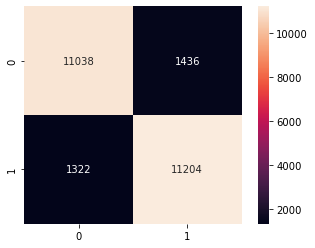

In [16]:
import numpy    as np
import pandas   as pd
import seaborn  as sns

import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing    import StandardScaler
from sklearn.preprocessing    import RobustScaler
from sklearn.preprocessing    import MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn.metrics          import accuracy_score
from sklearn.metrics          import classification_report
from sklearn.metrics          import confusion_matrix

from sklearn.decomposition  import PCA
get_accuracy_metrics(y_test, y_pred)
